In [251]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [252]:

!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv

--2021-10-07 15:34:27--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: 'CreditScoring.csv.16'

     0K .......... .......... .......... .......... .......... 28% 1,09M 0s
    50K .......... .......... .......... .......... .......... 56% 1,19M 0s
   100K .......... .......... .......... .......... .......... 84% 5,69M 0s
   150K .......... .......... ........                        100%  878K=0,1s

2021-10-07 15:34:29 (1,38 MB/s) - 'CreditScoring.csv.16' saved [182489/182489]



In [253]:
df = pd.read_csv('CreditScoring.csv')
df.columns = df.columns.str.lower()

In [254]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [255]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [256]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

In [257]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,rent,60,39,married,no,fixed,69,92,0,0,900,1020
4451,ok,22,owner,60,46,married,no,fixed,60,75,3000,600,950,1263
4452,default,0,owner,24,37,married,no,partime,60,90,3500,0,500,963
4453,ok,0,rent,48,23,single,no,freelance,49,140,0,0,550,550


In [258]:
df=df[df.status!='unk'].reset_index(drop=True)

In [259]:
df['default'] = (df.status == 'default').astype(int)
del df['status']

In [260]:
df.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73,129,0,0,800,846,0
1,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658,0
2,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985,1
3,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325,0
4,0,rent,36,26,single,no,fixed,46,107,0,0,310,910,0


What are the categorical variables? What are the numerical?

In [261]:
numerical=['seniority','time','age','expenses','income','assets','debt','amount','price']
categorical=['home','marital','records','job']


Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split funciton for that with random_state=1

In [262]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [263]:
len(df_train),len(df_val),len(df_test)

(2672, 891, 891)

In [264]:
df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)

In [265]:
y_train=df_train.default
y_val=df_val.default
y_test=df_test.default

del df_train['default']
del df_val['default']
del df_test['default']

In [266]:
y_train

0       1
1       0
2       0
3       0
4       0
       ..
2667    1
2668    0
2669    1
2670    0
2671    0
Name: default, Length: 2672, dtype: int32

## Question 1
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

- For each numerical variable, use it as score and compute AUC with the "default" variable
- Use the training dataset for that
- If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['expenses'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [267]:
y_train

0       1
1       0
2       0
3       0
4       0
       ..
2667    1
2668    0
2669    1
2670    0
2671    0
Name: default, Length: 2672, dtype: int32

In [268]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score

score=[]
param=['seniority','time','debt','income']
for n in param:
    clf=RandomForestClassifier(n_estimators=100,random_state=0)
    clf.fit(df_train[n].to_frame(),y_train)
    y_pred=clf.predict(df_val[n].to_frame())
    auc_score=roc_auc_score(y_val,y_pred)
    if auc_score<0.5:
        clf.fit(-df_train[n].to_frame(),y_train)
        y_pred=clf.predict(df_val[n].to_frame())
        auc_score=roc_auc_score(y_val,y_pred)

    print(f'{n}: {auc_score:.4f}')

seniority: 0.5771
time: 0.5000
debt: 0.5000
income: 0.5704


### Training the model
From now on, use these columns only:

['seniority', 'income', 'assets', 'records', 'job', 'home']

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [269]:
var=['seniority', 'income', 'assets', 'records', 'job', 'home']

In [270]:
from sklearn.feature_extraction import DictVectorizer

In [271]:
dv=DictVectorizer(sparse=False)

train_dict=df_train[var].to_dict(orient='record')
X_train=dv.fit_transform(train_dict)

val_dict=df_val[var].to_dict(orient='record')
X_val=dv.fit_transform(val_dict)

C:\Users\luthf\AppData\Local\Temp/ipykernel_18980/1106013373.py:3: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  train_dict=df_train[var].to_dict(orient='record')
C:\Users\luthf\AppData\Local\Temp/ipykernel_18980/1106013373.py:6: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  val_dict=df_val[var].to_dict(orient='record')


### Question 2
What's the AUC of this model on the validation dataset? (round to 3 digits)

0.512 \ 
0.612 \ 
0.712 \  
0.812 \ 

In [272]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [273]:
model.fit(X_train,y_train)
y_pred = model.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)

0.8110480872250583

In [274]:
print("AUC score : {}".format(round(roc_auc_score(y_val, y_pred), 3)))

AUC score : 0.811


### Question 3
Now let's compute precision and recall for our model.

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
For each threshold, compute precision and recall
Plot them

In [275]:
thresholds = np.linspace(0, 1, 101)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [276]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score

In [277]:
pf_score=[]
for t in thresholds:
    tp=((y_pred>=t) & (y_val==1)).sum()
    fp=((y_pred>=t) & (y_val==0)).sum()
    fn=((y_pred<t) & (y_val==1)).sum()
    precision=tp/(tp+fp)
    recall = tp/(tp+fn)
    pf_score.append((t,precision,recall,tp,fp,fn))

df_score=pd.DataFrame(pf_score,columns=['thresholds','precision','recall','TP','FP','FN'])


C:\Users\luthf\AppData\Local\Temp/ipykernel_18980/488024582.py:6: RuntimeWarning: invalid value encountered in longlong_scalars
  precision=tp/(tp+fp)


In [278]:
df_score.head()

,thresholds,precision,recall,TP,FP,FN
0,0.00,0.276094,1.00000,246,645,0
1,0.01,0.279228,1.00000,246,635,0
2,0.02,0.285714,0.99187,244,610,2
3,0.03,0.290516,0.98374,242,591,4
4,0.04,0.300995,0.98374,242,562,4


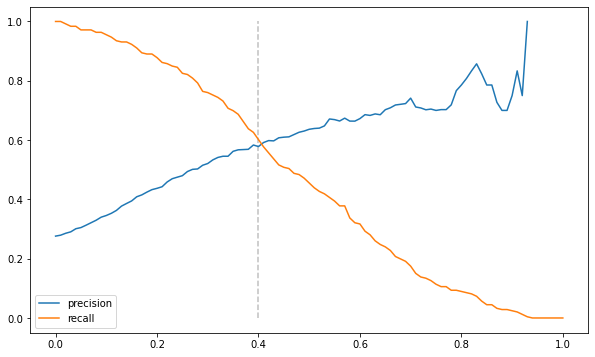

In [279]:
plt.figure(figsize=(10, 6))
plt.plot(df_score.thresholds,df_score.precision)
plt.plot(df_score.thresholds,df_score.recall)
plt.legend(['precision','recall'])
plt.vlines(0.4, 0, 1, color='grey', linestyle='--', alpha=0.5)
plt.show()


### Question 4
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$
Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

In [280]:
df_score['f1'] = 2 * df_score.precision * df_score.recall / (df_score.precision + df_score.recall)

In [281]:
df_score[::10]

,thresholds,precision,recall,TP,FP,FN,f1
0,0.0,0.276094,1.000000,246,645,0,0.432718
10,0.1,0.345588,0.955285,235,445,11,0.507559
20,0.2,0.437247,0.878049,216,278,30,0.583784
30,0.3,0.520891,0.760163,187,172,59,0.618182
40,0.4,0.578125,0.601626,148,108,98,0.589641
50,0.5,0.636364,0.455285,112,64,134,0.530806
60,0.6,0.672414,0.317073,78,38,168,0.430939
70,0.7,0.741379,0.174797,43,15,203,0.282895
80,0.8,0.785714,0.089431,22,6,224,0.160584
90,0.9,0.750000,0.024390,6,2,240,0.047244


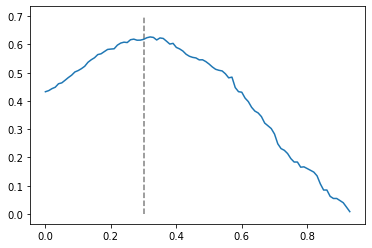

In [282]:
plt.plot(df_score.thresholds,df_score['f1'])
plt.vlines(0.3,0,0.7,color='grey',linestyle='--')

### Question 5
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)
- Iterate over different folds of df_full_train
- Split the data into train and validation
- Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
- Use AUC to evaluate the model on validation


How large is standard devidation of the scores across different folds?

In [283]:
from sklearn.model_selection import KFold

In [284]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

columns = ['seniority', 'income', 'assets', 'records', 'job', 'home']
C=1
def train(df_train,y_train,C):
    dicts = df_train[columns].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train=dv.fit_transform(dicts)
    
    LR = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    LR.fit(X_train,y_train)
    return dv, model

In [289]:
dv,model=train(df_train,y_train,C)

In [290]:
def predict(df,dv,model):
    dicts=df[columns].to_dict(orient='receord')
   
    X=dv.transform(dicts)
    y_pred=model.predict_proba(X)[:,1]
    
    return y_pred

In [291]:
y_pred=predict(df_val,dv,model)

C:\Users\luthf\AppData\Local\Temp/ipykernel_18980/3481825687.py:2: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  dicts=df[columns].to_dict(orient='receord')


In [292]:
from sklearn.metrics import roc_auc_score
import statistics

score=[]
for train_idx,val_idx in kfold.split(df_full_train):
    df_train=df_full_train.iloc[train_idx]
    df_val=df_full_train.iloc[val_idx]
    
    y_train=df_train.default.values
    y_val=df_val.default.values
    
    dv, model = train(df_train, y_train, C=1.0)
    y_pred=predict(df_val,dv,model)
    
    auc=roc_auc_score(y_val,y_pred)
    score.append(auc)
    
print(np.std(score))

C:\Users\luthf\AppData\Local\Temp/ipykernel_18980/3481825687.py:2: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  dicts=df[columns].to_dict(orient='receord')
C:\Users\luthf\AppData\Local\Temp/ipykernel_18980/3481825687.py:2: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  dicts=df[columns].to_dict(orient='receord')
C:\Users\luthf\AppData\Local\Temp/ipykernel_18980/3481825687.py:2: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  dicts=df[columns].to_dict(orient='receord')
C:\Users\luthf\AppData\Lo

0.013962007286985849


C:\Users\luthf\AppData\Local\Temp/ipykernel_18980/3481825687.py:2: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  dicts=df[columns].to_dict(orient='receord')


### Question 6
Now let's use 5-Fold cross-validation to find the best parameter C

- Iterate over the following C values: [0.01, 0.1, 1, 10]
- Initialize KFold with the same parameters as previously
- Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
- Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

In [ ]:
C=[0.01,0.1,1,10]

In [306]:
for C in [0.01,0.1,1,10]:
    score=[]
    for train_idx,val_idx in kfold.split(df_full_train):
        df_train=df_full_train.iloc[train_idx]
        df_val=df_full_train.iloc[val_idx]

        y_train=df_train.default.values
        y_val=df_val.default.values

        dv, model = train(df_train, y_train, C=C)
        y_pred=predict(df_val,dv,model)

        auc=roc_auc_score(y_val,y_pred)
        score.append(auc)
    
    print("C : ",C,"\n","mean : ",np.mean(score),"\n","std : ",np.std(score))
        
    

C:\Users\luthf\AppData\Local\Temp/ipykernel_18980/3481825687.py:2: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  dicts=df[columns].to_dict(orient='receord')
C:\Users\luthf\AppData\Local\Temp/ipykernel_18980/3481825687.py:2: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  dicts=df[columns].to_dict(orient='receord')
C:\Users\luthf\AppData\Local\Temp/ipykernel_18980/3481825687.py:2: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  dicts=df[columns].to_dict(orient='receord')
C:\Users\luthf\AppData\Lo

C :  0.01 
 mean :  0.8167184864643803 
 std :  0.013962007286985849


C:\Users\luthf\AppData\Local\Temp/ipykernel_18980/3481825687.py:2: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  dicts=df[columns].to_dict(orient='receord')
C:\Users\luthf\AppData\Local\Temp/ipykernel_18980/3481825687.py:2: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  dicts=df[columns].to_dict(orient='receord')
C:\Users\luthf\AppData\Local\Temp/ipykernel_18980/3481825687.py:2: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  dicts=df[columns].to_dict(orient='receord')
C:\Users\luthf\AppData\Lo

C :  0.1 
 mean :  0.8167184864643803 
 std :  0.013962007286985849


C:\Users\luthf\AppData\Local\Temp/ipykernel_18980/3481825687.py:2: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  dicts=df[columns].to_dict(orient='receord')
C:\Users\luthf\AppData\Local\Temp/ipykernel_18980/3481825687.py:2: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  dicts=df[columns].to_dict(orient='receord')
C:\Users\luthf\AppData\Local\Temp/ipykernel_18980/3481825687.py:2: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  dicts=df[columns].to_dict(orient='receord')
C:\Users\luthf\AppData\Lo

C :  1 
 mean :  0.8167184864643803 
 std :  0.013962007286985849


C:\Users\luthf\AppData\Local\Temp/ipykernel_18980/3481825687.py:2: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  dicts=df[columns].to_dict(orient='receord')
C:\Users\luthf\AppData\Local\Temp/ipykernel_18980/3481825687.py:2: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  dicts=df[columns].to_dict(orient='receord')


C :  10 
 mean :  0.8167184864643803 
 std :  0.013962007286985849


C:\Users\luthf\AppData\Local\Temp/ipykernel_18980/3481825687.py:2: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  dicts=df[columns].to_dict(orient='receord')
C:\Users\luthf\AppData\Local\Temp/ipykernel_18980/3481825687.py:2: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  dicts=df[columns].to_dict(orient='receord')
